# Learning about Viewbox

In [36]:
import collections
import itertools
import os.path
import tkinter as tk

import gym
import gym.envs.registration
import gym.spaces

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.set_printoptions(threshold=np.inf)   # non-truncated numpy array during print


## Rewrite viewbox_slice()

The original code by HumanCompatibleAI/multi-agent is very unreadable.

I need to rewrite it for making the code more maintainable.

In [27]:
# Generate slice(tuple) to slice out observation space for agents
def viewbox_slice(location, orientation, width, depth, offset=0):
        
        # These are inputs for generating an observation space for the agent
        # Note that if width is 10, the agent can perceive 5 pixels to the left, 
        # 1 pixel directly in front of itself, and 4 pixels to its right.
        left = width // 2
        right = left if width % 2 == 0 else left + 1
        x, y = location

        print (x, y, width, depth, offset, left, right)
        UP = (slice(x - left, x + right), slice(y - offset, y - offset - depth, -1))
        RIGHT = (slice(x + offset, x + offset + depth), slice(y - left, y + right))
        DOWN = (slice(x + left, x - right, -1), slice(y + offset, y + offset + depth))
        LEFT = (slice(x - offset, x - offset - depth, -1), slice(y + left, y - right, -1))

        views = [UP,RIGHT,DOWN,LEFT]       

        return views[orientation]


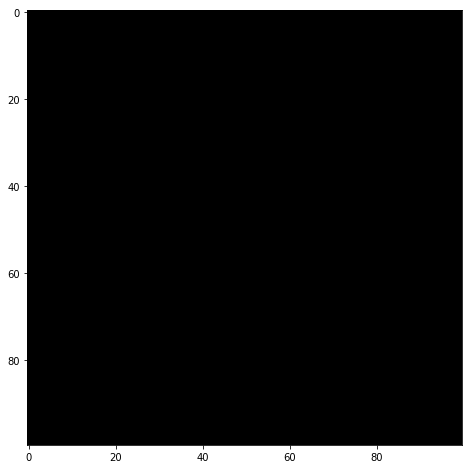

In [58]:
game_space=np.full((100,100), 10)

plt.imshow(game_space)
plt.show()


95 95 5 10 0 2 3


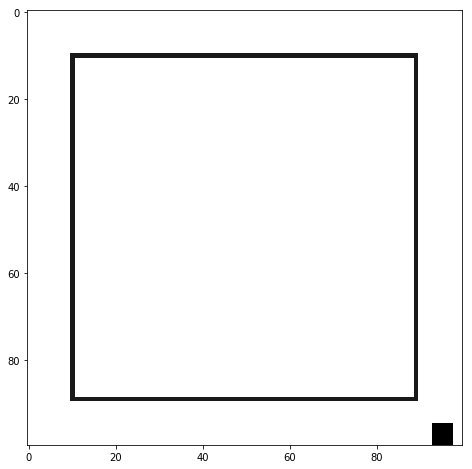

In [62]:
view = viewbox_slice((95,95), 1, 5, 10)
game_space[view] = 0

p = 10
game_space[p:-p, p] = 1
game_space[p:-p, -p - 1] = 1
game_space[p, p:-p] = 1
game_space[-p - 1, p:-p] = 1

plt.imshow(game_space)
plt.show()

In [61]:
view = viewbox_slice((95,95), 1, 5, 10)
observation = game_space[view]
print (observation)

95 95 5 10 0 2 3
[[10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]]


In [64]:
game_space[(slice(0,60,1), slice(0,20,1))]

array([[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10

In [67]:
agents = [{'start':(1,1)},{'start':(2,2)},{'start':(3,3)}]

starts = [(agent['start'][0]+20, agent['start'][1]+20) for agent in agents]
print (starts)

[(21, 21), (22, 22), (23, 23)]
